## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [1]:
from sklearn.datasets import load_boston
data=load_boston()
X,y=data['data'],data['target']
X.shape,y.shape

((506, 13), (506,))

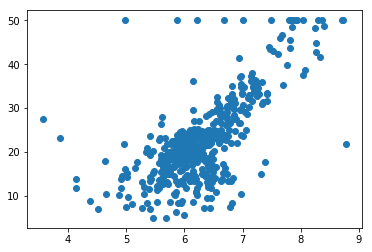

In [2]:
x=X[:,5]
import matplotlib.pyplot as plt
%matplotlib inline
def draw_scatter_plot():
    plt.scatter(x,y)
draw_scatter_plot()

In [3]:
type(x),type(y)

(numpy.ndarray, numpy.ndarray)

In [6]:
import numpy as np
def loss_1(y,y_hat):
    return np.sum((y-y_hat)**2)/len(y)
def loss_2(y,y_hat):
    return np.sum(np.abs(y-y_hat))/len(y)

In [7]:
#1 随机选择 k、b
import random
trying_times=1000
min_loss=float('inf')
best_k,best_b=None,None
for i in range(trying_times):
    k=random.random()*200-100
    b=random.random()*200-100
    y_hat=k*x+b
    
    current_loss=loss_1(y,y_hat)
#     current_loss=loss_2(y,y_hat)
    if current_loss<min_loss:
        min_loss=current_loss
        best_k,best_b=k,b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: -44.01792167129408 best_b: 48.860134315569695, and the loss is: 64088.56091282876
When time is : 6, get best_k: -19.102812802807676 best_b: -40.35157230717261, and the loss is: 33902.06971656203
When time is : 9, get best_k: -6.740135558054931 best_b: 24.345702864576182, and the loss is: 1811.265413504743
When time is : 22, get best_k: -1.5635867762391058 best_b: 51.24089698902097, and the loss is: 456.159890474904
When time is : 66, get best_k: 4.067658137456689 best_b: 4.760439109735188, and the loss is: 116.79381002968205
When time is : 67, get best_k: 14.609325963430479 best_b: -67.43180734008982, and the loss is: 61.96495838442146
When time is : 698, get best_k: 10.450769728068181 best_b: -41.74203253665063, and the loss is: 46.46912596559292
When time is : 969, get best_k: 8.839350101132325 best_b: -34.019268753949405, and the loss is: 44.63455148848815


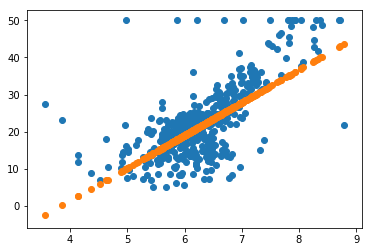

In [8]:
k=8.84
b=-34.02
y_hat=k*x+b
draw_scatter_plot()
plt.scatter(x,y_hat)
plt.show()

In [9]:
#根据target调整k、b的方向
trying_times=1000
min_loss=float('inf')

best_k=random.random()*200-100
best_b=random.random()*200-100

direction=[
    (+1,-1),
    (+1,-1),
    (-1,-1),
    (-1,+1)
]
next_direction=random.choice(direction)
scalar=0.1
for i in range(trying_times):
    k_direction,b_direction=next_direction
    current_k,current_b=best_k+k_direction*scalar,best_b+b_direction*scalar
    y_hat=current_k*x+current_b
    current_loss=loss_1(y,y_hat)
    if current_loss<min_loss:
        min_loss=current_loss
        best_k,best_b=current_k,current_b
        next_direction=next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))        
    else:
        next_direction=random.choice(direction)

When time is : 0, get best_k: -79.31671337935366 best_b: 58.526895391584695, and the loss is: 217785.45812868507
When time is : 1, get best_k: -79.21671337935366 best_b: 58.426895391584694, and the loss is: 217288.21948568994
When time is : 2, get best_k: -79.11671337935367 best_b: 58.32689539158469, and the loss is: 216791.54924381137
When time is : 3, get best_k: -79.01671337935367 best_b: 58.22689539158469, and the loss is: 216295.4474030492
When time is : 4, get best_k: -78.91671337935368 best_b: 58.12689539158469, and the loss is: 215799.9139634036
When time is : 5, get best_k: -78.81671337935369 best_b: 58.02689539158469, and the loss is: 215304.94892487445
When time is : 6, get best_k: -78.71671337935369 best_b: 57.92689539158469, and the loss is: 214810.55228746173
When time is : 7, get best_k: -78.6167133793537 best_b: 57.826895391584685, and the loss is: 214316.72405116554
When time is : 8, get best_k: -78.5167133793537 best_b: 57.726895391584684, and the loss is: 213823.4642

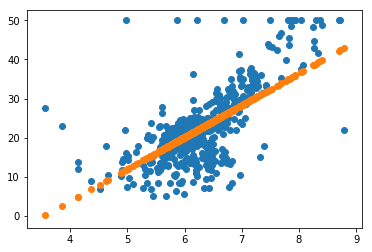

In [10]:
k=8.183
b=-28.973
y_hat=k*x+b
draw_scatter_plot()
plt.scatter(x,y_hat)
plt.show()

In [12]:
#梯度下降法
def gradient_k(x,y,y_hat):
    return -2*np.sum((y-y_hat)*x)/len(y)
def gradient_b(y,y_hat):
    return -2*np.sum(y-y_hat)/len(y)

In [34]:
trying_times=200
learning_rate=0.01
min_loss = float('inf')
current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100
for i in range(trying_times):
    y_hat=current_k*x+current_b
    current_loss=loss_1(y,y_hat)
    print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, current_loss))
    current_k=current_k-gradient_k(x,y,y_hat)*learning_rate
    current_b=current_b-gradient_b(y,y_hat)*learning_rate    

When time is : 0, get best_k: 12.250241478260676 best_b: -30.992000865297825, and the loss is: 599.0184966062432
When time is : 1, get best_k: 9.270032008313187 best_b: -31.461270498462458, and the loss is: 61.80198393791862
When time is : 2, get best_k: 8.732337577160031 best_b: -31.54656420063693, and the loss is: 44.30820405045495
When time is : 3, get best_k: 8.635404683528247 best_b: -31.562567770529657, and the loss is: 43.73848764074544
When time is : 4, get best_k: 8.618008940564701 best_b: -31.566067513092854, and the loss is: 43.71988035114615
When time is : 5, get best_k: 8.614965969890482 best_b: -31.567310743116344, and the loss is: 43.719219206553625
When time is : 6, get best_k: 8.614512990980124 best_b: -31.568146629376585, and the loss is: 43.719142480304825
When time is : 7, get best_k: 8.61452736327412 best_b: -31.568908861774887, and the loss is: 43.71908481138748
When time is : 8, get best_k: 8.614626047840352 best_b: -31.569657656017483, and the loss is: 43.719027

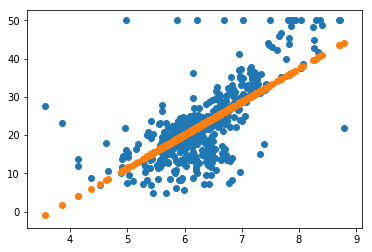

In [35]:
k=8.636
b=-31.70
y_hat=k*x+b
draw_scatter_plot()
plt.scatter(x,y_hat)
plt.show()

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: 总体分布未知，没有办法用复杂的公式表示出具有泛化能力的模型

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:由于每一次迭代参数选择的随机性，使得误差的变动具有随机性，误差不会随着迭代次数的增加而变小。

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:第二种方法比第一种好，因为每次迭代都尽量在往误差变小的方向调整参数。方法二的劣势是如果参数很多，各参数调整方向的排列组合很多，迭代的次数需要很多。

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:梯度的方向是损失函数下降最快的方向，减少迭代次数

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:梯度是一个向量，表示某一函数在该点处的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向（此梯度的方向）变化最快，变化率最大（为该梯度的模）。“下降”是沿着梯度的反方向调整参数。

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:如果学习率设置的恰当，由于梯度的负方向是使得损失函数下降的最快的方向，那么每进行一次迭代，都会最快的减小损失。

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:基于数据构建概率统计模型并运用训练好的模型进行未知数据的预测。

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

In [1]:
import requests
r=requests.get("http://www.bjsubway.com/station/zjgls/")
r.encoding='gbk'
data=r.text

In [2]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(data,'lxml')
text=soup.get_text()
#text

In [3]:
import re
pattern=r'\n\n\n(.+——.+)\n([0-9]+)\n(?:上行/下行|上行|下行)'
route=re.findall(pattern,text)
route

[('苹果园——古城', '2606'),
 ('古城——八角游乐园', '1921'),
 ('八角游乐园——八宝山', '1953'),
 ('八宝山——玉泉路', '1479'),
 ('玉泉路——五棵松', '1810'),
 ('五棵松——万寿路', '1778'),
 ('万寿路——公主坟', '1313'),
 ('公主坟——军事博物馆', '1172'),
 ('军事博物馆——木樨地', '1166'),
 ('木樨地——南礼士路', '1291'),
 ('南礼士路——复兴门', '424'),
 ('复兴门——西单', '1590'),
 ('西单——天安门西', '1217'),
 ('天安门西——天安门东', '925'),
 ('天安门东——王府井', '852'),
 ('王府井——东单', '774'),
 ('东单——建国门', '1230'),
 ('建国门——永安里', '1377'),
 ('永安里——国贸', '790'),
 ('国贸——大望路', '1385'),
 ('大望路——四惠', '1673'),
 ('四惠——四惠东', '1714'),
 ('西直门——车公庄', '909'),
 ('车公庄——阜成门', '960'),
 ('阜成门——复兴门', '1832'),
 ('复兴门——长椿街', '1234'),
 ('长椿街——宣武门', '929'),
 ('宣武门——和平门', '851'),
 ('和平门——前门', '1171'),
 ('前门——崇文门', '1634'),
 ('崇文门——北京站', '1023'),
 ('北京站——建国门', '945'),
 ('建国门——朝阳门', '1763'),
 ('朝阳门——东四十条', '1027'),
 ('东四十条——东直门', '824'),
 ('东直门——雍和宫', '2228'),
 ('雍和宫——安定门', '794'),
 ('安定门——鼓楼大街', '1237'),
 ('鼓楼大街——积水潭', '1766'),
 ('积水潭——西直门', '1899'),
 ('安河桥北——北宫门', '1363'),
 ('北宫门——西苑', '1251'),
 ('西苑——圆明园', '1672'),
 ('圆明园——北京大学东门', '

In [4]:
station_line=[]
for r in route:
    s1,s2=r[0].split('——')
    station_line.append((s1,s2,float(r[1])))
station_line

[('苹果园', '古城', 2606.0),
 ('古城', '八角游乐园', 1921.0),
 ('八角游乐园', '八宝山', 1953.0),
 ('八宝山', '玉泉路', 1479.0),
 ('玉泉路', '五棵松', 1810.0),
 ('五棵松', '万寿路', 1778.0),
 ('万寿路', '公主坟', 1313.0),
 ('公主坟', '军事博物馆', 1172.0),
 ('军事博物馆', '木樨地', 1166.0),
 ('木樨地', '南礼士路', 1291.0),
 ('南礼士路', '复兴门', 424.0),
 ('复兴门', '西单', 1590.0),
 ('西单', '天安门西', 1217.0),
 ('天安门西', '天安门东', 925.0),
 ('天安门东', '王府井', 852.0),
 ('王府井', '东单', 774.0),
 ('东单', '建国门', 1230.0),
 ('建国门', '永安里', 1377.0),
 ('永安里', '国贸', 790.0),
 ('国贸', '大望路', 1385.0),
 ('大望路', '四惠', 1673.0),
 ('四惠', '四惠东', 1714.0),
 ('西直门', '车公庄', 909.0),
 ('车公庄', '阜成门', 960.0),
 ('阜成门', '复兴门', 1832.0),
 ('复兴门', '长椿街', 1234.0),
 ('长椿街', '宣武门', 929.0),
 ('宣武门', '和平门', 851.0),
 ('和平门', '前门', 1171.0),
 ('前门', '崇文门', 1634.0),
 ('崇文门', '北京站', 1023.0),
 ('北京站', '建国门', 945.0),
 ('建国门', '朝阳门', 1763.0),
 ('朝阳门', '东四十条', 1027.0),
 ('东四十条', '东直门', 824.0),
 ('东直门', '雍和宫', 2228.0),
 ('雍和宫', '安定门', 794.0),
 ('安定门', '鼓楼大街', 1237.0),
 ('鼓楼大街', '积水潭', 1766.0),
 ('积水潭', '西直门', 1899.0),
 ('安河桥

In [5]:
station_connection={}
for t in station_line:
    s1,s2=t[0],t[1]
    if s1 not in station_connection:
        station_connection[s1]=[]
        station_connection[s1].append(s2)
    else:
        station_connection[s1].append(s2)
    if s2 not in station_connection:
        station_connection[s2]=[]
        station_connection[s2].append(s1)
    else:
        station_connection[s2].append(s1)
station_connection

{'T2航站楼': ['T3航站楼', '三元桥'],
 'T3航站楼': ['三元桥', 'T2航站楼'],
 '七里庄': ['六里桥', '丰台东大街', '大井', '西局'],
 '万寿路': ['五棵松', '公主坟'],
 '万源街': ['亦庄文化园', '荣京东街'],
 '三元桥': ['太阳宫', '亮马桥', '东直门', 'T3航站楼', 'T2航站楼'],
 '上地': ['五道口', '西二旗'],
 '东单': ['王府井', '建国门', '灯市口', '崇文门'],
 '东四': ['张自忠路', '灯市口', '南锣鼓巷', '朝阳门'],
 '东四十条': ['朝阳门', '东直门'],
 '东夏园': ['郝家府', '潞城'],
 '东大桥': ['朝阳门', '呼家楼'],
 '东湖渠': ['望京', '来广营'],
 '东直门': ['东四十条', '雍和宫', '柳芳', '三元桥'],
 '东风北桥': ['枣营', '将台'],
 '中关村': ['北京大学东门', '海淀黄庄'],
 '丰台东大街': ['七里庄', '丰台南路'],
 '丰台南路': ['丰台东大街', '科怡路'],
 '丰台科技园': ['科怡路', '郭公庄'],
 '丰台站': ['首经贸', '泥洼'],
 '临河里': ['梨园', '土桥'],
 '义和庄': ['黄村火车站', '生物医药基地'],
 '九棵树': ['果园', '梨园'],
 '九龙山': ['双井', '大郊亭', '平乐园', '大望路'],
 '五棵松': ['玉泉路', '万寿路'],
 '五道口': ['知春路', '上地'],
 '亦庄文化园': ['亦庄桥', '万源街'],
 '亦庄桥': ['旧宫', '亦庄文化园'],
 '亮马桥': ['三元桥', '农业展览馆'],
 '人民大学': ['海淀黄庄', '魏公村'],
 '什刹海': ['鼓楼大街', '南锣鼓巷'],
 '传媒大学': ['高碑店', '双桥'],
 '俸伯': ['顺义'],
 '健德门': ['牡丹园', '北土城'],
 '光熙门': ['芍药居', '柳芳'],
 '八宝山': ['八角游乐园', '玉泉路'],
 '八角游乐园': ['古城', '八宝山'

In [6]:
r2=requests.get("https://www.cnblogs.com/tianlin106/p/7007511.html")
r2.encoding='utf-8'
long_lat=r2.text
soup=BeautifulSoup(long_lat,'lxml')
text2=soup.get_text()
#text2

In [7]:
pattern2=r'(?:\n|\|)(.+),(\d+.\d+),(\d+.\d+)'
loc=re.findall(pattern2,text2)
location=loc[0][0].split('|')
location[-1]=location[-1]+','+loc[0][-2]+','+loc[0][-1]
location

['苹果园,39.9263251384,116.1777806282',
 '古城,39.9072014648,116.1902475357',
 '八角游乐园,39.9074319023,116.2128210068',
 '八宝山,39.9072673042,116.2358236313',
 '玉泉路,39.9073331435,116.2530326843',
 '五棵松,39.9078269362,116.2740182877',
 '万寿路,39.9074319023,116.2951755524',
 '公主坟,39.9074319023,116.3097667694',
 '军事博物馆,39.9074648219,116.3240146637',
 '木樨地,39.9076294195,116.3374471664',
 '南礼士路,39.9072014648,116.3525962830',
 '复兴门,39.9071685451,116.3565444946',
 '西单,39.9074319023,116.3742685318',
 '天安门西,39.9074648219,116.3917350769',
 '天安门东,39.9077281779,116.4016485214',
 '王府井,39.9080244523,116.4115619659',
 '东单,39.9081890486,116.4179134369',
 '建国门,39.9085182400,116.4358091354',
 '永安里,39.9083865636,116.4504861832',
 '国贸,39.9091436994,116.4619016647',
 '大望路,39.9085182400,116.4770936966',
 '四惠,39.9087157541,116.4954614639',
 '四惠东,39.9085182400,116.5153312683',
 '北京站,39.9049628889,116.4272689819',
 '崇文门,39.9009793597,116.4168834686',
 '前门,39.8999587488,116.3979578018',
 '和平门,39.9000904414,116.3841819763',


In [8]:
station_location={}
for s in location:
    station,long,lat=s.split(',')
    long,lat=float(long),float(lat)
    station_location[station]=(long,lat)

In [9]:
station_location

{'七里庄': (39.8675310111, 116.2942126393),
 '万寿路': (39.907475, 116.295134),
 '三元桥': (39.9613658535, 116.4568376541),
 '上地': (40.032981, 116.320205),
 '东单': (39.908283, 116.418076),
 '东四': (39.9243700208, 116.4174936712),
 '东四十条': (39.933661, 116.434216),
 '东大桥': (39.9228797332, 116.4517012239),
 '东直门': (39.941401, 116.433763),
 '中关村': (39.984078, 116.316496),
 '丰台站': (39.8498560655, 116.305013895),
 '义和庄': (39.71254959, 116.3189502),
 '五棵松': (39.907494, 116.274048),
 '亮马桥': (39.9490830824, 116.4619070292),
 '人民大学': (39.966976, 116.321483),
 '俸伯': (40.1325679642, 116.6849541664),
 '八宝山': (39.907437, 116.235718),
 '八角游乐园': (39.907401, 116.212686),
 '公主坟': (39.907497, 116.310096),
 '公益西桥': (39.837114, 116.370829),
 '六里桥': (39.8803337264, 116.3027608395),
 '军事博物馆': (39.907692, 116.321864),
 '农业展览馆': (39.9417090706, 116.4621269703),
 '分钟寺': (39.8518740541, 116.4539784193),
 '刘家窑': (39.8576455856, 116.422124505),
 '前门': (39.900132, 116.397957),
 '动物园': (39.93829, 116.338606),
 '劲松': (39.884437

In [27]:
#过滤掉不存在经纬度的站
station_connection_2={}
for k,v in station_connection.items():
    if k in station_location:
        station_connection_2[k]=[]
        for s in v:
            if s in station_location:
                station_connection_2[k].append(s)
station_connection_2        

{'七里庄': ['六里桥', '大井', '西局'],
 '万寿路': ['五棵松', '公主坟'],
 '三元桥': ['太阳宫', '亮马桥', '东直门'],
 '上地': ['西二旗'],
 '东单': ['王府井', '建国门', '灯市口', '崇文门'],
 '东四': ['张自忠路', '灯市口', '南锣鼓巷', '朝阳门'],
 '东四十条': ['朝阳门', '东直门'],
 '东大桥': ['朝阳门', '呼家楼'],
 '东直门': ['东四十条', '雍和宫', '三元桥'],
 '中关村': ['北京大学东门', '海淀黄庄'],
 '丰台站': ['首经贸', '泥洼'],
 '义和庄': ['黄村火车站', '生物医药基地'],
 '五棵松': ['玉泉路', '万寿路'],
 '亮马桥': ['三元桥', '农业展览馆'],
 '人民大学': ['海淀黄庄', '魏公村'],
 '俸伯': ['顺义'],
 '八宝山': ['八角游乐园', '玉泉路'],
 '八角游乐园': ['古城', '八宝山'],
 '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
 '公益西桥': ['角门西', '新宫'],
 '六里桥': ['七里庄', '西局', '莲花桥'],
 '军事博物馆': ['公主坟', '木樨地'],
 '农业展览馆': ['亮马桥', '团结湖'],
 '分钟寺': ['十里河', '成寿寺'],
 '刘家窑': ['蒲黄榆', '宋家庄'],
 '前门': ['和平门', '崇文门'],
 '动物园': ['国家图书馆', '西直门'],
 '劲松': ['双井', '潘家园'],
 '北京南站': ['陶然亭', '马家堡'],
 '北京大学东门': ['圆明园', '中关村'],
 '北京站': ['崇文门', '建国门'],
 '北土城': ['安贞门'],
 '北宫门': ['安河桥北', '西苑'],
 '北新桥': ['雍和宫', '张自忠路'],
 '北海北': ['平安里', '南锣鼓巷'],
 '北苑路北': ['立水桥南', '大屯路东'],
 '十里堡': ['金台路', '青年路'],
 '十里河': ['潘家园', '分钟寺'],
 '南法信': ['后沙峪

In [28]:
station_location_2={}
for k,v in station_location.items():
    if k in station_connection_2:
        station_location_2[k]=station_location[k]
len(station_connection_2),len(station_location_2) 

(170, 170)

In [11]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [13]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family']='sans-serif'

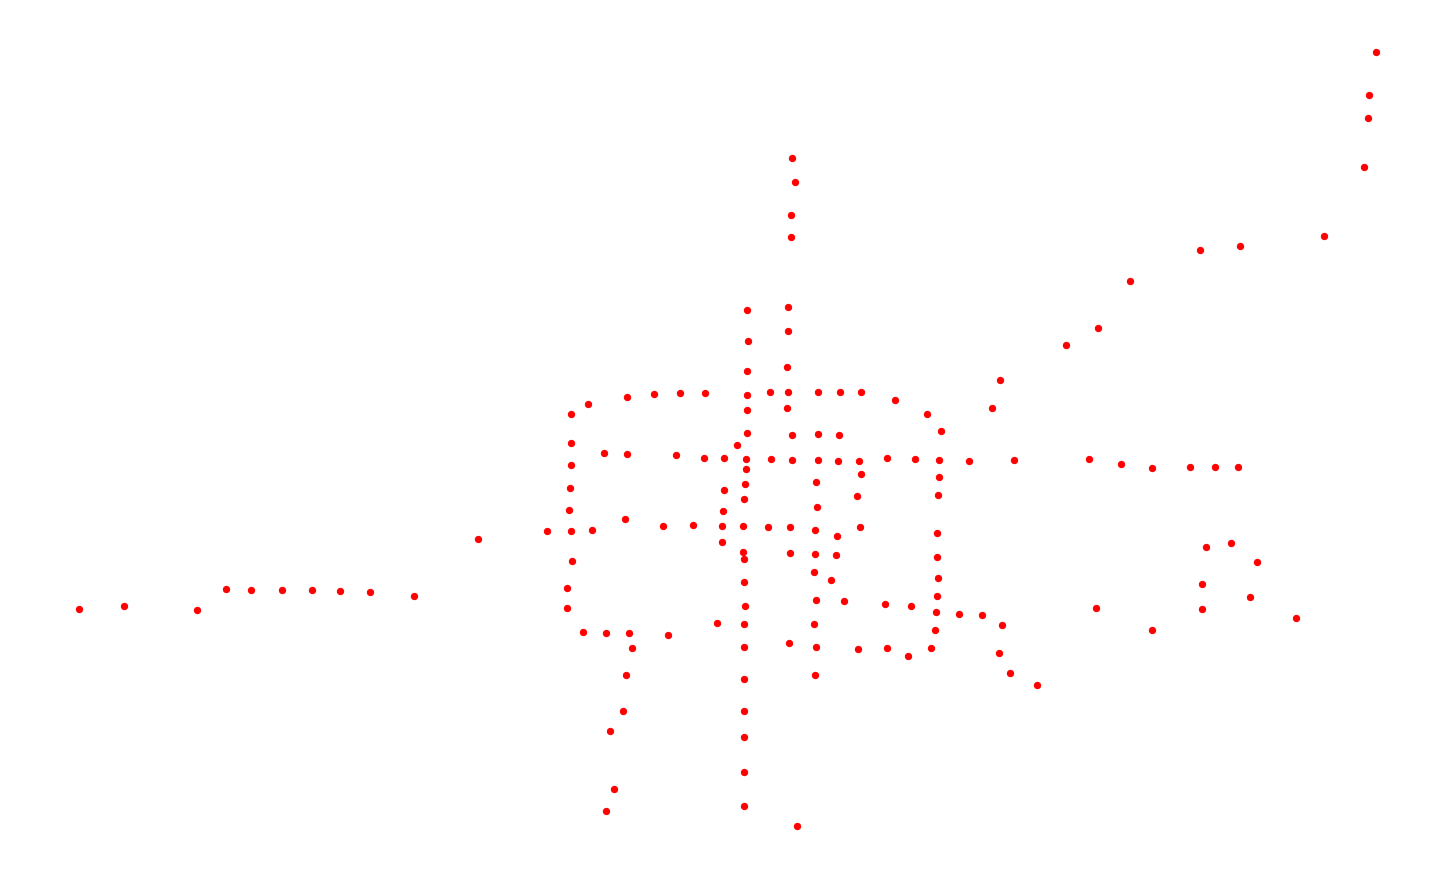

In [29]:
plt.figure(figsize=(20,12))
station_graph = nx.Graph()
station_graph.add_nodes_from(list(station_location_2.keys()))
nx.draw(station_graph, station_location_2, with_labels=False, node_size=40,node_color='r')

C:\Users\Liu Qiong\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


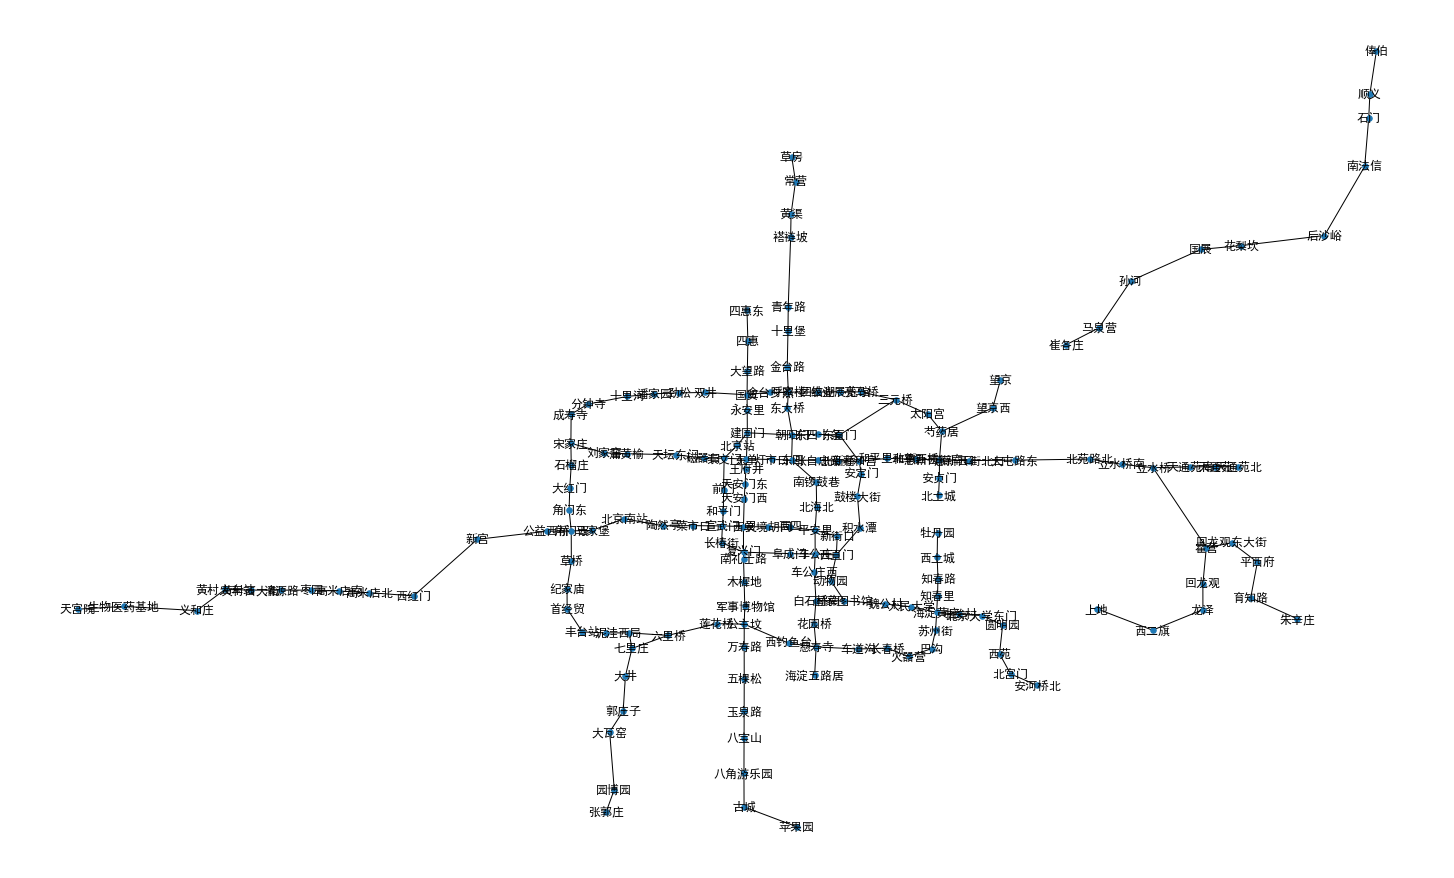

In [34]:
plt.figure(figsize=(20,12))
station_with_line=nx.Graph(station_connection_2)
nx.draw(station_with_line,station_location_2,with_labels=True,node_size=30)

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [31]:
from collections import defaultdict
station_connection_info = defaultdict(list)
station_connection_info.update(station_connection_2)

In [37]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: 
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for station in successors:
            if station in path: continue  # eliminate loop
                
            new_path = path + [station]
            
            pathes.append(new_path)
            
            if station == destination: return new_path
        
        visitied.add(froninter)
        
        pathes = sort_candidate(pathes) 

In [38]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [42]:
search('北京南站', '平安里',station_connection_info, sort_candidate=transfer_stations_first)

['北京南站', '陶然亭', '菜市口', '宣武门', '西单', '灵境胡同', '西四', '平安里']

In [43]:
def pretty_print(cities):
    print('🚝->'.join(cities))

In [44]:
pretty_print(search('北京站', '动物园',station_connection_info, sort_candidate=transfer_stations_first))

北京站🚝->建国门🚝->朝阳门🚝->东四🚝->南锣鼓巷🚝->北海北🚝->平安里🚝->新街口🚝->西直门🚝->动物园


## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)